In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

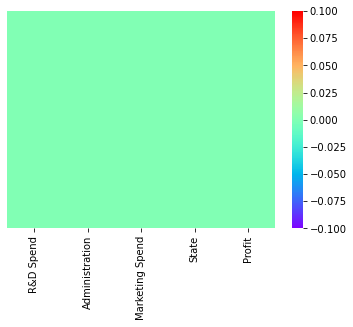

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

### splitting dataset

In [7]:
X=df.iloc[:,:4]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
Y=df.iloc[:,4:]
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## doing one-hot encoding so that we can convert object data into integer data

In [9]:
state=pd.get_dummies(X['State'])
state.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [10]:
state.columns=['California','Florida','New York']

### droping the State col and merging the one hot encoded column

In [14]:
X.drop('State',axis=1,inplace=True)
X.head()

KeyError: "['State'] not found in axis"

In [15]:
X=pd.concat([X,state],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1,0,0,1
1,162597.70,151377.59,443898.53,1,0,0,1,0,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0
3,144372.41,118671.85,383199.62,0,0,1,0,0,1
4,142107.34,91391.77,366168.42,0,1,0,0,1,0


In [17]:
X.drop('California',axis=1,inplace=True)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Florida,New York
0,165349.20,136897.80,471784.10,0,1,0,1
1,162597.70,151377.59,443898.53,0,0,0,0
2,153441.51,101145.55,407934.54,1,0,1,0
3,144372.41,118671.85,383199.62,0,1,0,1
4,142107.34,91391.77,366168.42,1,0,1,0


In [18]:
X.drop('New York',axis=1,inplace=True)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,1,1


In [19]:
X.drop('Florida',axis=1,inplace=True)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [20]:
X=pd.concat([X,state],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


### Split the dataset into testing and training

In [28]:
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=10)

### calling linear regression

In [29]:
reg=LinearRegression()
model=reg.fit(X_train,Y_train)

In [30]:
y_pred=reg.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.9796796125083208